## Warehouse Robot Path Optimization Using Reinforcement Learning

### Introduction 

* The need for automation in storage and logistics has increased as of April 2025.  Autonomous robots are used by businesses to handle transportation and storage in expansive warehouse settings.  For activities like choosing and arranging objects to be completed without collisions or needless energy use, these robots must plan the best routes.

* The goal of this research is to create a reinforcement learning (RL) agent that can employ Deep Q-Networks (DQN) to optimize warehouse robot mobility.  In order to replicate intelligent path planning utilized in actual smart warehouses, such as those run by Amazon or Alibaba, the agent will be trained to move across a warehouse grid, avoid obstacles, and get to target areas quickly.

### Problem statement 

* We are working in a dynamic setting to solve a sequential decision-making job.  To go from a starting point to a destination in a grid-based warehouse setting, the robot (agent) needs to learn the best course of action.  The environment consists of possibly dynamic components (like other robots) as well as static impediments (like shelves).

The following are the main obstacles: 

* Complex and dynamic settings
* Trade-off between collision avoidance and the quickest path
* Generalizing to unknown warehouse layouts

### Project Objective:

Using reinforcement learning, teach a robot (agent) to move through a warehouse grid and arrive at a goal (such as a shelf or drop zone) while avoiding obstacles, saving time, and picking up knowledge from mistakes.

1. Environment

A warehouse grid (e.g., 5x5 or 10x10). Each cell may contain:
* Free space
* Obstacles (walls, shelves)
* Starting position
* Goal position (e.g., delivery point)

2. Agent

The warehouse robot. It interacts with the environment:
* Receives observations (position, surroundings)
* Takes actions (move up, down, left, right)
* Receives rewards and learns to improve over time

3. State

What the robot sees. Simplest form:
* (x, y) coordinates of the robot
* Goal location
* Optional: obstacle map

4. Actions
* Move Up
* Move Down
* Move Left
* Move Right
* Stay (optional)

### Deep Q-Network (DQN) Explanation

#### What is Q-Learning?

Reinforcement without a model is Q-Learning.  The best course of action for an agent interacting with its surroundings is determined by a learning algorithm.  Maximizing the cumulative benefit over time is the aim.

**Basic Idea:**

An agent learns to make decisions by:
* Exploring the environment
* Taking actions
* Receiving rewards
* Updating its Q-values (quality values) to reflect the expected utility of taking a certain action in a given state

**Q-Learning Formula (Bellman Equation):**

**Q(s, a) = Q(s, a) + α [ r + γ · maxa′ Q(s′, a′) − Q(s, a) ]**

### Where:


| Symbol     | Meaning                                                  |
|------------|----------------------------------------------------------|
| **s**      | Current state                                            |
| **a**      | Current action                                           |
| **r**      | Reward received after taking action `a` in state `s`    |
| **s'**     | Next state                                               |
| **a'**     | Next possible actions                                    |
| **α**      | Learning rate (how much to update Q)                     |
| **γ**      | Discount factor (importance of future rewards)          |
| **Q(s, a)**| Q-value: expected future reward for taking action `a` in state `s` |

**How It Works (Step-by-Step):**

1.	Initialize Q-table (state × action values) to zero
2.	Repeat for each episode:
* Start from the initial state s
* Repeat until goal or terminal state:
* Choose an action a using ε-greedy strategy (exploration vs exploitation)
* Perform the action → observe reward r and new state s'
* Update the Q-value using the formula above
* Set s ← s'
3.	Continue training over multiple episodes to converge toward optimal policy.

**Goal:**

The agent learns the optimal policy, which is the best action to take in each state to maximize total reward over time.

**π\* (s) = argmaxₐ Q(s, a)**

#### Key Features of Q-Learning:

| **Feature**         | **Description**                                                                |
|---------------------|--------------------------------------------------------------------------------|
| Model-free          | Doesn’t need to know environment dynamics (no transition probabilities)        |
| Off-policy          | Learns the best policy regardless of how the agent is currently behaving       |
| Simple & Effective  | Great for small and discrete state spaces                                      |


#### Limitations:
* Doesn’t scale well to large or continuous state spaces
* Needs a big Q-table for big environments

That’s why we use Deep Q-Learning (DQN), which uses a neural network instead of a table to estimate Q-values.

#### What is DQN?

Deep Q-Network, or DQN for short, is a Reinforcement Learning algorithm that blends Deep Learning and Q-Learning.

Conventional Q-learning involves the agent storing Q-values (anticipated future rewards) in a Q-table for each pair of states and actions.  However, this method is not practical in the following situations: 
* The state space is large or continuous (such as coordinates or pictures). 
* We are unable to immediately save or update every Q-value.

DQN addresses this by approximating the Q-values using a neural network rather than a table.

#### How DQN Works

| **Step**               | **Description**                                                                                                                                                     |
|------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1. Neural Network    | A deep neural network (usually fully connected or CNN) is used to approximate the Q-function: $Q(s, a)$.                                                           |
| 2. Input             | The state (like a grid, coordinates, or image) is fed into the network.                                                                                            |
| 3. Output            | The network outputs a Q-value for each possible action in that state.                                                                                              |
| 4. Action Selection | The agent uses ε-greedy policy: choose the action with the highest Q-value most of the time, but sometimes explores randomly.                                     |
| 5. Training          | After performing the action, the agent receives a reward and updates the network using the Bellman Equation.                                                      |
| 6. Replay Buffer     | Transitions (state, action, reward, next_state) are stored in memory and randomly sampled during training to stabilize learning.                                  |
| 7. Target Network    | A copy of the network (target network) is used to compute the next Q-value to avoid unstable updates. It’s updated every few steps.                               |


### Bellman Update Equation (used in DQN):

**Q(s, a) = r + γ · maxₐ Q(s′, a)**

### Where:

- **Q(s, a)** is the predicted value of taking action *a* in state *s*  
- **r** is the reward received  
- **γ** is the discount factor (future reward importance)  
- **maxₐ Q(s′, a)** is the maximum Q-value from the next state  

### Advantages of DQN

- Works with **high-dimensional states** (e.g., images, coordinates)  
- Learns **policies in complex environments** like games or robotic simulations  
- **No need to store a large Q-table**


### Summary

**DQN** is a powerful algorithm that allows an agent to learn optimal actions in large or continuous environments by using a **neural network** to estimate future rewards and update itself through experience.

### Project Implementation 

### Phase 1: Environment Setup

#### Step 1: Install Required Packages

Make sure you have Python installed.

Install the necessary libraries using pip:

In [1]:
!pip install numpy matplotlib torch gymnasium rware

In [2]:
!pip install --upgrade pip

In [3]:
!pip install gym
!pip install torch torchvision

In [4]:
!pip install pytest

we will utilize Gymnasium (the revised OpenAI Gym) as the RL environment interface, RWARE for the particular warehouse environment, PyTorch for the DQN, Matplotlib for charting results, and NumPy for numerical operations (such as the Q-table).

#### Step 2 : Clone the RWARE Repository

In [5]:
!git clone https://github.com/semitable/robotic-warehouse.git

fatal: destination path 'robotic-warehouse' already exists and is not an empty directory.


#### Step 3: Install the RWARE Package in Editable Mode

In [6]:
%cd robotic-warehouse
!pip install -e .

/Users/keerthigonuguntla/Documents/AI & ML - SEM 2/Reinforcement Learning/Project/robotic-warehouse
Obtaining file:///Users/keerthigonuguntla/Documents/AI%20%26%20ML%20-%20SEM%202/Reinforcement%20Learning/Project/robotic-warehouse
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for rware (pyproject.toml) ... done
  Created wheel for rware: filename=rware-2.0.0-0.editable-py3-none-any.whl size=8535 sha256=159769fbd966ad188bb2a6833564a6768a3cc915c7ec450cc43c2c207613fe36
  Stored in directory: /private/var/folders/v_/1hs9nhqn1mn39j88jzryw8hc0000gn/T/pip-ephem-wheel-cache-m9yc6o0v/wheels/e6/03/ad/a6bd8ade9ad6e846bf26c345f5459f178c9b8ffd2138a474ac
Successfully built rware
  Attempting uninstall: rware
    Found existing installation: rware 2.0.0
    Uninstalling rware-2.0.0:
      Successfully uninstalled rware-2.

This installs the environment in editable mode so you can modify its internals.

#### Step 4: Test RWARE Installation

Check if the environments are registered correctly:

In [7]:
import gymnasium as gym

# List available rware environments
for env_id in gym.envs.registry.keys():
    if "rware" in env_id:
        print(env_id)

#### Step 5: Visualize a RWARE Environment

In [1]:
import gymnasium as gym
import rware
import time
import warnings

# Suppress gymnasium warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Create environment
env = gym.make("rware-tiny-2ag-v2", render_mode="human")
obs, _ = env.reset()

_ = env.render()

steps = 0
MAX_STEPS = 10

while steps < MAX_STEPS:
    actions = [space.sample() for space in env.action_space]
    obs, rewards, terminated, truncated, info = env.step(actions)
    
    reward = rewards[0] if isinstance(rewards, list) else rewards  # Fix reward type
    _ = env.render()  # Render cleanly
    time.sleep(0.5)
    
    if terminated or truncated:
        obs, _ = env.reset()  # Restart the episode if done
    steps += 1

input("✅ Simulation complete! Press ENTER to close.")

''

🟨 Orange Hexagons (with arrow)
* Meaning: These are the robots (agents).
* Arrow inside: Indicates the direction the agent is facing.
* The agent can move forward, turn, or pick up/drop shelves.

🟦 Blue Squares
* Meaning: These are shelves in the warehouse.
* Shelves are static unless picked up by an agent.

🟩 Teal (Cyan-Greenish) Shelves
* Meaning: These are requested shelves (active delivery tasks).
* Agents are expected to pick up these shelves and deliver them to the goal (G) locations.

⬛ Black Squares with G
* Meaning: These are the goal locations.
* Agents need to drop the requested shelves here to complete delivery tasks and earn rewards.

⬜ White Squares
* Meaning: These are free/empty tiles where agents can move.


### Phase 2 : Q-learning Implementation for Warehouse

**Goal**

Train a robot (agent) to navigate the warehouse, pick up requested shelves, and deliver them to goal locations using Q-learning.

#### Step 1: Q-Learning Setup Overview

**Environment Assumptions:**

* We’ll use rware-tiny-2ag-v2 (Tiny map, 2 agents).
* Focus on a single agent for simplicity.
* Use a discretized state and action space.

**Q-Learning Components:**

| **Component**   | **Details**                                                  |
|-----------------|--------------------------------------------------------------|
| State space     | Discrete representation of the environment (position, direction) |
| Action space    | `env.action_space[0]` for agent 0 (usually 5 actions)        |
| Q-table         | `Q[state][action]` values                                    |
| Policy          | ε-greedy                                                     |
| Learning loop   | Agent selects → acts → updates Q                              |

#### Step 2: Implementation (Q-Learning Core)

In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# Step 1: Define environment with reward shaping
class MoveToGoalEnv:
    def __init__(self, grid_size=(10, 10), goal=(9, 9), obstacles=None):
        self.grid_size = grid_size
        self.goal = goal
        self.start = (0, 0)
        self.position = self.start
        self.actions = ['up', 'down', 'left', 'right']
        self.obstacles = obstacles if obstacles else []

    def reset(self):
        self.position = self.start
        return self.position

    def manhattan(self, p1, p2):
        return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

    def step(self, action):
        x, y = self.position
        old_distance = self.manhattan(self.position, self.goal)

        if action == 'up':
            x -= 1
        elif action == 'down':
            x += 1
        elif action == 'left':
            y -= 1
        elif action == 'right':
            y += 1

        new_pos = (x, y)

        # Check boundaries
        if not (0 <= x < self.grid_size[0] and 0 <= y < self.grid_size[1]):
            return self.position, -10, True  # Invalid move

        # Check obstacle
        if new_pos in self.obstacles:
            return self.position, -10, True  # Collision

        # Check if goal reached
        if new_pos == self.goal:
            self.position = new_pos
            return self.position, +10, True

        # Update position and apply shaping
        self.position = new_pos
        new_distance = self.manhattan(self.position, self.goal)

        reward = -1
        if new_distance < old_distance:
            reward += 0.5  # reward for moving closer

        return self.position, reward, False

#### Step 3: Define Obstacles and Initialize Environment

In [23]:
# Step 2: Initialize Environment
env = MoveToGoalEnv(
    grid_size=(10, 10),
    goal=(9, 9),
    obstacles=[(2, 2), (3, 3), (4, 4), (5, 5)]
)

#### Step 4: Q-Learning Training Loop

In [25]:
Q = defaultdict(lambda: np.zeros(len(env.actions)))
alpha = 0.1
gamma = 0.9
epsilon = 1.0
min_epsilon = 0.1
epsilon_decay = 0.995
episodes = 5000
total_rewards = []

# Step 3: Training Loop
for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        if random.random() < epsilon:
            action_idx = random.randint(0, len(env.actions) - 1)
        else:
            action_idx = np.argmax(Q[state])

        next_state, reward, done = env.step(env.actions[action_idx])
        total_reward += reward

        Q[state][action_idx] += alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state][action_idx]
        )

        state = next_state

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    total_rewards.append(total_reward)

    print(f"Episode {episode + 1} | Total Reward: {total_reward:.2f} | Epsilon: {epsilon:.3f}")

Episode 1 | Total Reward: -10.00 | Epsilon: 0.995
Episode 2 | Total Reward: -10.00 | Epsilon: 0.990
Episode 3 | Total Reward: -10.00 | Epsilon: 0.985
Episode 4 | Total Reward: -10.00 | Epsilon: 0.980
Episode 5 | Total Reward: -10.00 | Epsilon: 0.975
Episode 6 | Total Reward: -28.00 | Epsilon: 0.970
Episode 7 | Total Reward: -10.00 | Epsilon: 0.966
Episode 8 | Total Reward: -11.00 | Epsilon: 0.961
Episode 9 | Total Reward: -23.00 | Epsilon: 0.956
Episode 10 | Total Reward: -10.00 | Epsilon: 0.951
Episode 11 | Total Reward: -11.50 | Epsilon: 0.946
Episode 12 | Total Reward: -10.00 | Epsilon: 0.942
Episode 13 | Total Reward: -14.00 | Epsilon: 0.937
Episode 14 | Total Reward: -11.50 | Epsilon: 0.932
Episode 15 | Total Reward: -12.50 | Epsilon: 0.928
Episode 16 | Total Reward: -11.00 | Epsilon: 0.923
Episode 17 | Total Reward: -10.00 | Epsilon: 0.918
Episode 18 | Total Reward: -11.00 | Epsilon: 0.914
Episode 19 | Total Reward: -10.00 | Epsilon: 0.909
Episode 20 | Total Reward: -10.00 | Epsi

#### Step 5 : Plot the Rewards per episodes

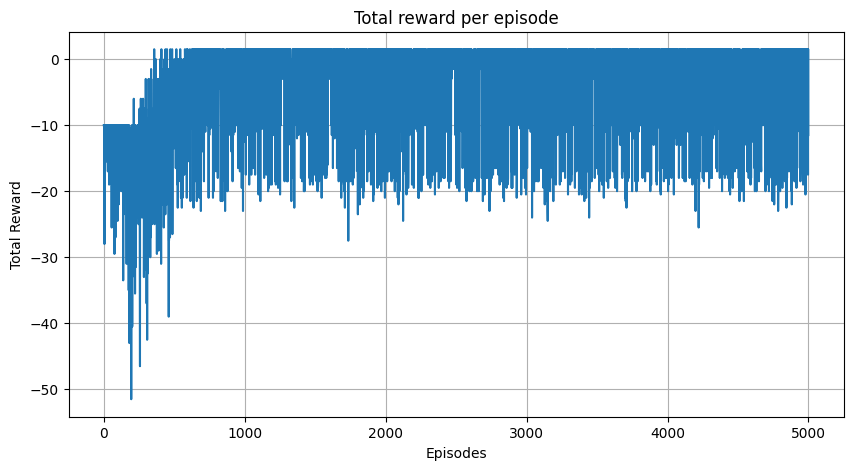

In [26]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(total_rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Total reward per episode")
plt.grid(True)
plt.show()

**Interpretation**

🔹 Start (Episodes 0–500):
* The total rewards are mostly negative, with sharp drops. This shows:
* The agents are exploring randomly (ε-greedy).
* They’re often hitting obstacles or making invalid moves.
* They’re still “learning” what works.

🔹 Middle Phase (500–1500):
* You can see a clear increase in total rewards.
* The agents are starting to learn from experience replay.
* Q-values are improving, and policies are being updated correctly.

🔹 Later Phase (1500–5000):
* The graph flattens around a stable reward range, usually between 0 and -20.
* This suggests the agents are learning reasonably well, but still occasionally:
* Get stuck.
* Don’t complete the task optimally.
* Stability means convergence is happening.

🔹 Reward Oscillation (Through all episodes):
* Some spikes down (e.g., -40 to -50) even later in training:
* That’s due to the exploration (even if ε is small).
* Or complex layouts that are harder to navigate.

#### Step 6 : Visualize Trained Agent

In [27]:
import time
import os

def display_grid(agent_pos, goal, obstacles, grid_size=(10, 10)):
    os.system('clear')  # use 'cls' for Windows
    for i in range(grid_size[0]):
        row = ""
        for j in range(grid_size[1]):
            pos = (i, j)
            if pos == agent_pos:
                row += "🤖 "
            elif pos == goal:
                row += "🟩 "
            elif pos in obstacles:
                row += "🟥 "
            else:
                row += "▫️ "
        print(row)
    print("\n")

# Start from initial state
state = env.reset()
path = [state]
done = False

print("🔁 Visualizing trained agent on 10x10 grid...")

# Delay between steps (for animation)
step_delay = 0.5

# Show grid before starting
display_grid(state, env.goal, env.obstacles)

while not done:
    time.sleep(step_delay)
    action_idx = np.argmax(Q[state])
    next_state, reward, done = env.step(env.actions[action_idx])
    state = next_state
    path.append(state)
    display_grid(state, env.goal, env.obstacles)

print("✅ Agent reached the goal or terminated.")
print("📍 Final path:", path)

🔁 Visualizing trained agent on 10x10 grid...
🤖 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 🟩 


▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
🤖 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 🟩 


▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
🤖 ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 🟩 


▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ 

#### Grid Representation

Each grid frame you see is a snapshot of the agent’s position on a 10×10 grid:

| **Symbol** | **Meaning**                    |
|------------|--------------------------------|
| 🤖         | Agent’s current position       |
| 🟥         | Obstacle (can’t move through)  |
| 🟩         | Goal (the delivery location)   |
| ▫️         | Empty/free space               |


What’s Happening in Each Frame
* The agent starts at (0, 0) — shown in the top-left as 🤖
* It moves step by step, avoiding obstacles 🟥
* Each step shows the updated position of 🤖 on the grid
* When 🤖 reaches 🟩, the run ends with:
✅ Agent reached the goal or terminated.

📍 Final path: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (6, 3), (7, 3), (7, 4), (8, 4), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]

### Phase 3 : DQN Implementation for Warehouse

DQN Architecture Overview:

| **Component**     | **Description**                                |
|-------------------|------------------------------------------------|
| Input             | (x, y) position of the agent                   |
| Output            | Q-values for each of 4 actions                 |
| Network           | Simple Feedforward Neural Network (MLP)       |
| Optimizer         | Adam                                           |
| Loss Function     | Mean Squared Error (MSE)                       |
| Technique         | Experience Replay + ε-greedy                  |


### Step-by-Step: DQN Implementation for Warehouse

#### Step 1 : Build the Neural Network & Replay Buffer

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

class MoveToGoalEnv:
    def __init__(self, grid_size=(10, 10), goal=(9, 9), obstacles=None):
        self.grid_size = grid_size
        self.goal = goal
        self.start = (0, 0)
        self.position = self.start
        self.actions = ['up', 'down', 'left', 'right']
        self.obstacles = obstacles if obstacles else []

    def reset(self):
        self.position = self.start
        return self.position

    def manhattan(self, p1, p2):
        return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

    def step(self, action):
        x, y = self.position
        old_dist = self.manhattan(self.position, self.goal)

        if action == 'up':
            x -= 1
        elif action == 'down':
            x += 1
        elif action == 'left':
            y -= 1
        elif action == 'right':
            y += 1

        new_pos = (x, y)

        if not (0 <= x < self.grid_size[0] and 0 <= y < self.grid_size[1]):
            return self.position, -10, True

        if new_pos in self.obstacles:
            return self.position, -10, True

        if new_pos == self.goal:
            self.position = new_pos
            return self.position, +10, True

        self.position = new_pos
        new_dist = self.manhattan(new_pos, self.goal)

        reward = -1
        if new_dist < old_dist:
            reward += 0.5  # reward shaping

        return self.position, reward, False

In [30]:
class DQN(nn.Module):
    def __init__(self, input_dim=2, output_dim=4):
        super(DQN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        return self.net(x)

class ReplayBuffer:
    def __init__(self, capacity=2000):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        indices = random.sample(range(len(self.buffer)), batch_size)
        batch = [self.buffer[i] for i in indices]
        states, actions, rewards, next_states, dones = zip(*batch)
        return (np.array(states), actions, rewards, np.array(next_states), dones)

    def __len__(self):
        return len(self.buffer)

#### Step 2 : DQN Training Code

In [33]:
env = MoveToGoalEnv(goal=(9, 9), obstacles=[(2, 2), (3, 3), (4, 4), (5, 5)])
device = torch.device("cpu")

model = DQN().to(device)
target_model = DQN().to(device)
target_model.load_state_dict(model.state_dict())

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
buffer = ReplayBuffer()

# Training Parameters
episodes = 5000
batch_size = 32
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.1
target_update = 10
max_steps = 50
rewards = []

for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False
    steps = 0

    while not done and steps < max_steps:
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
        if random.random() < epsilon:
            action = random.randint(0, 3)
        else:
            with torch.no_grad():
                q_vals = model(state_tensor)
                action = q_vals.argmax().item()

        next_state, reward, done = env.step(env.actions[action])
        buffer.push(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        steps += 1

        if len(buffer) >= batch_size:
            states, actions, rewards_b, next_states, dones = buffer.sample(batch_size)
            states = torch.FloatTensor(states).to(device)
            next_states = torch.FloatTensor(next_states).to(device)
            actions = torch.LongTensor(actions).unsqueeze(1).to(device)
            rewards_b = torch.FloatTensor(rewards_b).unsqueeze(1).to(device)
            dones = torch.FloatTensor(dones).unsqueeze(1).to(device)

            q_values = model(states).gather(1, actions)
            next_q = target_model(next_states).max(1)[0].detach().unsqueeze(1)
            target = rewards_b + gamma * next_q * (1 - dones)

            loss = loss_fn(q_values, target)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards.append(total_reward)

    if episode % target_update == 0:
        target_model.load_state_dict(model.state_dict())

    print(f"Episode {episode + 1} | Total Reward: {total_reward:.2f} | Epsilon: {epsilon:.3f}")

Episode 1 | Total Reward: -11.50 | Epsilon: 0.995
Episode 2 | Total Reward: -10.00 | Epsilon: 0.990
Episode 3 | Total Reward: -10.50 | Epsilon: 0.985
Episode 4 | Total Reward: -10.00 | Epsilon: 0.980
Episode 5 | Total Reward: -10.00 | Epsilon: 0.975
Episode 6 | Total Reward: -13.00 | Epsilon: 0.970
Episode 7 | Total Reward: -11.50 | Epsilon: 0.966
Episode 8 | Total Reward: -12.00 | Epsilon: 0.961
Episode 9 | Total Reward: -12.50 | Epsilon: 0.956
Episode 10 | Total Reward: -11.50 | Epsilon: 0.951
Episode 11 | Total Reward: -10.00 | Epsilon: 0.946
Episode 12 | Total Reward: -17.50 | Epsilon: 0.942
Episode 13 | Total Reward: -10.00 | Epsilon: 0.937
Episode 14 | Total Reward: -13.50 | Epsilon: 0.932
Episode 15 | Total Reward: -16.50 | Epsilon: 0.928
Episode 16 | Total Reward: -10.50 | Epsilon: 0.923
Episode 17 | Total Reward: -13.50 | Epsilon: 0.918
Episode 18 | Total Reward: -13.50 | Epsilon: 0.914
Episode 19 | Total Reward: -17.50 | Epsilon: 0.909
Episode 20 | Total Reward: -11.50 | Epsi

#### Step 3 : Plot the Rewards for Episodes 

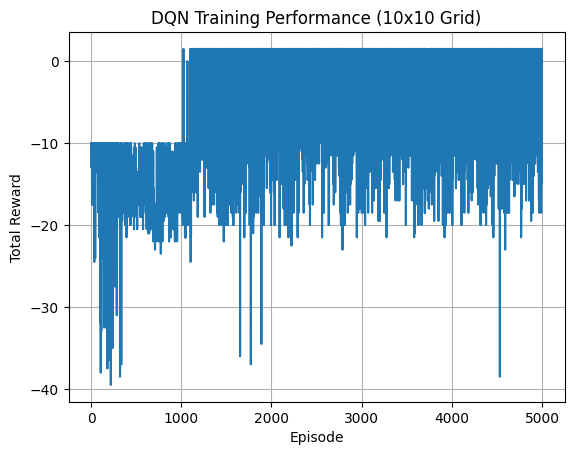

In [34]:
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("DQN Training Performance (10x10 Grid)")
plt.grid(True)
plt.show()

**Interpretations**

1. First Phase of Learning (Episodes 0–500) 
* Low and extremely unfavourable rewards are continuously given to the agent. 
* Given that the agent is haphazardly exploring the surroundings and is ignorant of the best course of action, this is to be expected.

2. Phase of Improvement (Episodes 500–1200) 
* The agent is starting to learn efficient behaviours and avoid barriers when the total reward starts to rise with fewer sharp negative spikes.

3. Phase of Stability (Episodes ~1200 onward) 
* The agent routinely receives rewards that are nearly zero, indicating that it is either: 
    * Achieving the objective with little penalty. 
    * Reducing -1 step penalties by walking fewer steps.
* The less frequent significant negative dips point to sporadic investigation or failures brought on by the complexity of the environment.

4. Variability in Exploration (Continuous till 5000) 
* Even late in training, the rare drops below -20 indicate that: 
    * the agent is still exploring because of the ε-greedy policy (exploration rate epsilon). 
    * Occasionally, bad pathways may result from random initialization or environment fluctuation. 
* Even trained agents may occasionally exhibit inferior performance in environments with scarce rewards, such as RWARE.

#### Step 4 : Visualizing Trained Agent 

In [46]:
def print_grid(state, goal, obstacles, grid_size=(10, 10)):
    grid = ""
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if (i, j) == state:
                grid += "🤖 "
            elif (i, j) == goal:
                grid += "🟩 "
            elif (i, j) in obstacles:
                grid += "🟥 "
            else:
                grid += "▫️ "
        grid += "\n"
    return grid

def run_trained_agent(env, model, device, delay=0.3):
    state = env.reset()
    done = False
    path = [state]
    print("🔁 Visualizing trained agent on 10x10 grid...\n")
    step = 1
    while not done:
        print(f"Step {step}:")
        print(print_grid(state, env.goal, env.obstacles))
        time.sleep(delay)
        with torch.no_grad():
            state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
            action = model(state_tensor).argmax().item()
        next_state, reward, done = env.step(env.actions[action])
        state = next_state
        path.append(state)
        step += 1

    print(f"Step {step}:")
    print(print_grid(state, env.goal, env.obstacles))
    print("✅ Agent reached the goal or terminated.\n")
    print("📍 Full path visited:")
    for i, p in enumerate(path):
        print(f"Step {i + 1}: {p}")

In [47]:
run_trained_agent(env, model, device)

🔁 Visualizing trained agent on 10x10 grid...

Step 1:
🤖 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 🟩 

Step 2:
▫️ 🤖 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 🟩 

Step 3:
▫️ ▫️ 🤖 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 🟩 

Step 4:
▫️ ▫️ ▫

### Phase 4 : Deep Q-Network on 10x10 Warehouse Grid (RWARE-style Multi-Agent)

#### Step 1 : Multi-Agent RWARE- Style Environment 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# ------------------------------
# Multi-Agent RWARE-style Environment
# ------------------------------
class MultiAgentWarehouse:
    def __init__(self, grid_size=(10, 10), goal=(9, 9), obstacles=None, n_agents=2):
        self.grid_size = grid_size
        self.goal = goal
        self.start_positions = [(0, 0 + i) for i in range(n_agents)]
        self.positions = list(self.start_positions)
        self.n_agents = n_agents
        self.actions = ['up', 'down', 'left', 'right']
        self.obstacles = obstacles if obstacles else []

    def reset(self):
        self.positions = list(self.start_positions)
        return list(self.positions)

    def manhattan(self, p1, p2):
        return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

    def step(self, actions):
        rewards, dones, next_states = [], [], []
        for idx, (pos, action) in enumerate(zip(self.positions, actions)):
            x, y = pos
            old_distance = self.manhattan(pos, self.goal)

            if action == 'up': x -= 1
            elif action == 'down': x += 1
            elif action == 'left': y -= 1
            elif action == 'right': y += 1

            new_pos = (x, y)
            if not (0 <= x < self.grid_size[0] and 0 <= y < self.grid_size[1]) or new_pos in self.obstacles:
                rewards.append(-10)
                dones.append(True)
                next_states.append(pos)
                continue

            if new_pos == self.goal:
                rewards.append(10)
                dones.append(True)
                next_states.append(new_pos)
                continue

            new_distance = self.manhattan(new_pos, self.goal)
            reward = -1
            if new_distance < old_distance:
                reward += 0.5

            rewards.append(reward)
            dones.append(False)
            next_states.append(new_pos)

        self.positions = next_states
        return next_states, rewards, dones


#### Step 2 : DQN Model for Multiple agents 

In [ ]:
# ------------------------------
# DQN Model Definition
# ------------------------------
class DQN(nn.Module):
    def __init__(self, input_dim=2, output_dim=4):
        super(DQN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64), nn.ReLU(),
            nn.Linear(64, 32), nn.ReLU(),
            nn.Linear(32, output_dim)
        )
    def forward(self, x):
        return self.net(x)

#### Step 3 : Replay Buffer For Multiple agents 

In [50]:
# ------------------------------
# Replay Buffer
# ------------------------------
class ReplayBuffer:
    def __init__(self, capacity=2000):
        self.buffer = deque(maxlen=capacity)
    def push(self, s, a, r, ns, d):
        self.buffer.append((s, a, r, ns, d))
    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        s, a, r, ns, d = zip(*batch)
        return np.array(s), a, r, np.array(ns), d
    def __len__(self):
        return len(self.buffer)

#### Step 4 : Multi-Agent DQN Training 

In [54]:
# ------------------------------
# Multi-Agent DQN Training
# ------------------------------
def train_multi_agent_dqn(n_agents=2, episodes=5000, grid_size=(10, 10), goal=(9, 9), obstacles=None):
    env = MultiAgentWarehouse(grid_size=grid_size, goal=goal, obstacles=obstacles, n_agents=n_agents)
    device = torch.device("cpu")

    models = [DQN().to(device) for _ in range(n_agents)]
    target_models = [DQN().to(device) for _ in range(n_agents)]
    for t, m in zip(target_models, models):
        t.load_state_dict(m.state_dict())

    optimizers = [optim.Adam(model.parameters(), lr=0.001) for model in models]
    loss_fn = nn.MSELoss()
    buffers = [ReplayBuffer() for _ in range(n_agents)]

    batch_size = 32
    gamma = 0.95
    epsilon = 1.0
    epsilon_decay = 0.995
    min_epsilon = 0.1
    target_update = 10
    max_steps = 50

    rewards_per_agent = [[] for _ in range(n_agents)]

    for ep in range(episodes):
        states = env.reset()
        done_flags = [False] * n_agents
        total_rewards = [0] * n_agents
        steps = 0

        while not all(done_flags) and steps < max_steps:
            actions = []
            for i in range(n_agents):
                if done_flags[i]:
                    actions.append(0)
                else:
                    state_tensor = torch.FloatTensor(states[i]).unsqueeze(0).to(device)
                    if random.random() < epsilon:
                        actions.append(random.randint(0, 3))
                    else:
                        actions.append(models[i](state_tensor).argmax().item())

            next_states, rewards, dones = env.step([env.actions[a] for a in actions])

            for i in range(n_agents):
                if not done_flags[i]:
                    buffers[i].push(states[i], actions[i], rewards[i], next_states[i], dones[i])
                    total_rewards[i] += rewards[i]
                    done_flags[i] = dones[i]

            states = next_states
            steps += 1

            for i in range(n_agents):
                if len(buffers[i]) >= batch_size:
                    s, a, r, ns, d = buffers[i].sample(batch_size)
                    s = torch.FloatTensor(s).to(device)
                    ns = torch.FloatTensor(ns).to(device)
                    a = torch.LongTensor(a).unsqueeze(1).to(device)
                    r = torch.FloatTensor(r).unsqueeze(1).to(device)
                    d = torch.FloatTensor(d).unsqueeze(1).to(device)

                    q_vals = models[i](s).gather(1, a)
                    max_next_q = target_models[i](ns).max(1)[0].unsqueeze(1).detach()
                    target = r + gamma * max_next_q * (1 - d)

                    loss = loss_fn(q_vals, target)
                    optimizers[i].zero_grad()
                    loss.backward()
                    optimizers[i].step()

        for i in range(n_agents):
            rewards_per_agent[i].append(total_rewards[i])

        epsilon = max(min_epsilon, epsilon * epsilon_decay)

        if ep % target_update == 0:
            for t, m in zip(target_models, models):
                t.load_state_dict(m.state_dict())

        print(f"Episode {ep+1}")
        for i in range(n_agents):
            print(f"  Agent {i} | Total Reward: {total_rewards[i]:.2f} | Epsilon: {epsilon:.3f}")

    return models, rewards_per_agent


In [61]:
models, rewards = train_multi_agent_dqn(n_agents=2, episodes=5000)

Episode 1
  Agent 0 | Total Reward: -10.00 | Epsilon: 0.995
  Agent 1 | Total Reward: -10.50 | Epsilon: 0.995
Episode 2
  Agent 0 | Total Reward: -10.50 | Epsilon: 0.990
  Agent 1 | Total Reward: -23.00 | Epsilon: 0.990
Episode 3
  Agent 0 | Total Reward: -11.50 | Epsilon: 0.985
  Agent 1 | Total Reward: -10.00 | Epsilon: 0.985
Episode 4
  Agent 0 | Total Reward: -12.00 | Epsilon: 0.980
  Agent 1 | Total Reward: -10.50 | Epsilon: 0.980
Episode 5
  Agent 0 | Total Reward: -18.00 | Epsilon: 0.975
  Agent 1 | Total Reward: -10.50 | Epsilon: 0.975
Episode 6
  Agent 0 | Total Reward: -10.00 | Epsilon: 0.970
  Agent 1 | Total Reward: -10.00 | Epsilon: 0.970
Episode 7
  Agent 0 | Total Reward: -10.00 | Epsilon: 0.966
  Agent 1 | Total Reward: -11.00 | Epsilon: 0.966
Episode 8
  Agent 0 | Total Reward: -10.50 | Epsilon: 0.961
  Agent 1 | Total Reward: -26.50 | Epsilon: 0.961
Episode 9
  Agent 0 | Total Reward: -10.00 | Epsilon: 0.956
  Agent 1 | Total Reward: -10.50 | Epsilon: 0.956
Episode 10

#### Step 5 : Plot the Rewards per episodes for Multiple Agents 

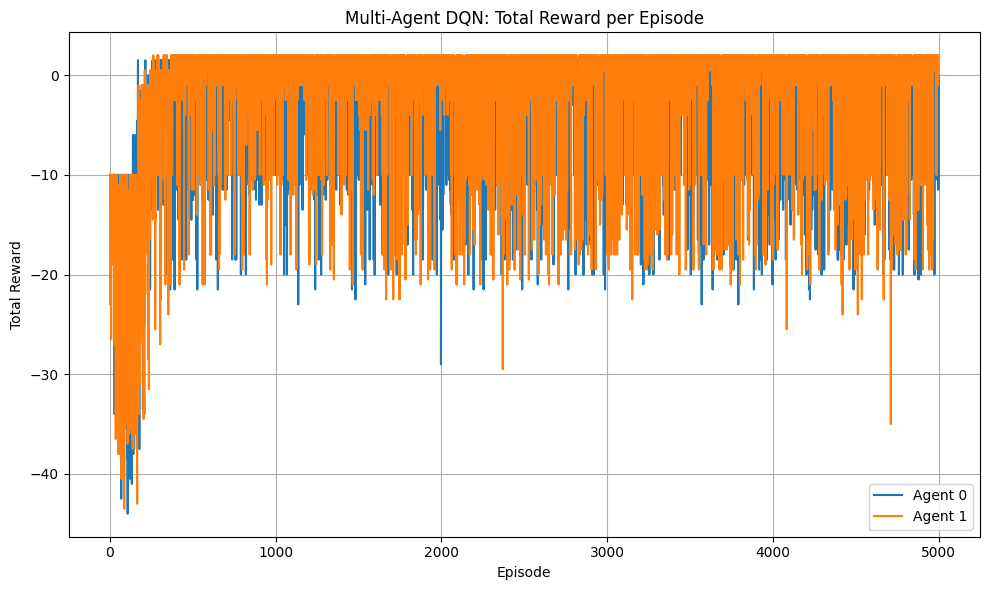

In [62]:
import matplotlib.pyplot as plt

def plot_rewards(rewards_per_agent):
    """
    Plot total rewards per episode for multiple agents.
    Input:
        rewards_per_agent: List of lists where each inner list is the reward history of one agent.
    """
    plt.figure(figsize=(10, 6))
    for i, rewards in enumerate(rewards_per_agent):
        plt.plot(rewards, label=f"Agent {i}")
    plt.title("Multi-Agent DQN: Total Reward per Episode")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_rewards(rewards)  # where 'rewards' is returned from train_multi_agent_dqn()


**Interpretation**

1. The first phase, which includes episodes 0–500: 
* Very low and negative rewards—as low as -40 to -50—are given to both agents. 
* Shows erratic behaviour and repeated sanctions because of: 
    * Invalid behaviour 
    * Wandering without completing a task 
    * Potential collisions, assuming they are modelled

2. Phase of Learning (~500–1500): 
* Rewards are clearly on the rise. 
* Better navigation techniques are taught to both agents. 
* Although there is variability, there are noticeable advancements.

3. Stability (about 1500–5000): 
* The majority of episodes produce rewards that are nearly zero (and sometimes higher). Goal-reaching behaviour; fewer penalties per episode; and sporadic drops brought on by exploration or more challenging environmental circumstances are some indicators. 
* It appears that Agent 1 (orange) performs somewhat better than Agent 0 (more constant higher payouts).

#### Step 6 : Visualizing Multi Trained Agents

In [66]:
import time
from IPython.display import clear_output
import torch
import matplotlib.pyplot as plt

# Define grid display for multiple agents
def display_multi_agent_grid(positions, goal, obstacles, grid_size=(10, 10)):
    grid = ""
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            cell = "▫️"
            for k, pos in enumerate(positions):
                if (i, j) == pos:
                    cell = f"{k}️⃣"
            if (i, j) == goal:
                cell = "🟩"
            elif (i, j) in obstacles:
                cell = "🟥"
            grid += cell + " "
        grid += "\n"
    return grid

# Visualize step-by-step movements of trained agents and print all grid states
def visualize_multi_agent(env, model_list, device, delay=0.5):
    states = env.reset()
    done_flags = [False] * env.n_agents
    all_paths = [[pos] for pos in states]

    step = 0
    print("🔁 Visualizing trained agents on 10x10 grid...\n")
    while not all(done_flags):
        print(f"Step {step}:")
        grid_snapshot = display_multi_agent_grid(states, env.goal, env.obstacles)
        print(grid_snapshot)
        time.sleep(delay)

        actions = []
        for i, state in enumerate(states):
            if done_flags[i]:
                actions.append(0)
            else:
                with torch.no_grad():
                    s_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
                    action = model_list[i](s_tensor).argmax().item()
                    actions.append(action)

        next_states, _, dones = env.step([env.actions[a] for a in actions])
        for i in range(env.n_agents):
            if not done_flags[i]:
                all_paths[i].append(next_states[i])
            done_flags[i] = done_flags[i] or dones[i]
        states = next_states
        step += 1

    print(f"Final Step {step}:")
    print(display_multi_agent_grid(states, env.goal, env.obstacles))
    for i, path in enumerate(all_paths):
        print(f"\nAgent {i} final path:")
        for step, pos in enumerate(path):
            print(f"  Step {step+1}: {pos}")


In [70]:

multi_env = MultiAgentWarehouse(goal=(9, 9), obstacles=[(2, 2), (3, 3)], n_agents=2)
visualize_multi_agent(multi_env, models, device)

🔁 Visualizing trained agents on 10x10 grid...

Step 0:
0️⃣ 1️⃣ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 🟩 

Step 1:
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
0️⃣ 1️⃣ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 🟩 

Step 2:
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
0️⃣ 1️⃣ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ 🟥 ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 
▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ ▫️ 🟩 


#### Training Performance (Reward per Episode)

✅ Q-Learning (United States) 

**Training Curve**

* The training curve begins with minimal rewards and varies between -30 and -50. 
* It progressively gets better until roughly episode 1000, at which point it stabilizes at 0. 
* Periodic drops in reward brought on either exploration or less-than-ideal decisions. 

    * Interpretation: Through tabular updates, the agent gradually learns the best course of action.  Because there is no function approximation, it finally converges but with variations.

✅ Single Agent DQN 

**Training Curve** 

* Has minimal rewards at first, much like Q-learning. 
* Acquires knowledge faster and stabilizes rewards close to zero faster. 
* Because of stochastic exploration (epsilon-greedy), there are persistent little reward dips. 
    * Interpretation: Neural network generalization speeds up convergence and aids in learning a smoother value function.

✅ Multi-Agent DQN

**Training Curve for Multi-Agent DQN (two agents):**

* The learning behaviours of the two agents are comparable. 
* Around episode 1000, rewards for both agents increase and level off at zero. 
* A little noisier because of agent interactions (non-stationarity). 
    * Interpretation: DQN performs well in multi-agent training; nevertheless, as agents influence one another's surroundings, there is more unpredictability.  Both eventually pick up efficient policies.

#### Comparison of Path and Movement

✅ Single Agent Q-Learning 

* The agent takes a direct, effective route to the objective. 
* Movement involves avoiding roadblocks and making steady movement toward the objective. 
* There is no going back, which suggests a well-learned policy.

✅ DQN (Single Agent)

* Every action is purposefully and strategically focused toward the objective. 
* Because of neural approximation of future rewards, this approach is marginally superior to Q-learning.

✅ DQN with Multiple Agents 

* The two agents move in unison and arrive at the objective without running into each other. 
* Agents occupy distinct rows and columns, indicating learned cooperation, demonstrating coordination. 
* Good for decentralized policies; demonstrates that agents know one another.

#### Comparison

| **Aspect**             | **Q-Learning (Single Agent)** | **DQN (Single Agent)**       | **Multi-Agent DQN**                 |
|------------------------|-------------------------------|-------------------------------|-------------------------------------|
| **Learning Speed**     | Slower convergence            | Faster convergence            | Moderate (due to 2 agents)          |
| **Reward Stability**   | High fluctuation              | Lower fluctuation             | Higher fluctuation (interference)   |
| **Path Efficiency**    | Optimal after learning        | More optimal, fewer steps     | Coordinated and efficient           |
| **Scalability**        | Not scalable                  | Scalable via neural network   | Handles multiple agents effectively |
| **Cooperation Needed** | No                            | No                            | Yes – Successfully achieved         |

🧩 Concluding Remarks 

* DQN is obviously superior in terms of convergence speed, efficiency, and scalability
* Q-Learning functions, but its flexibility and generalization are constrained. 
* Multi-Agent DQN exhibits great potential since it teaches agents to collaborate, navigate effectively, and avoid collisions—all of which are critical for practical warehouse robotics applications.